# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                 'address_raw',
                                                 'bfs_number',
                                                 'bfs_name',
                                                 'rooms', 
                                                 'area', 
                                                 'luxurious', 
                                                 'price', 
                                                 'price_per_m2',
                                                 'pop_dens',
                                                 'frg_pct']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",112,Bubikon,3.5,122,1,3180,26.07,632.558140,11.410675
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",112,Bubikon,4.0,87,0,1690,19.43,632.558140,11.410675
2,1662023745-834,"8608 Bubikon, ZH",112,Bubikon,3.5,92,0,2350,25.54,632.558140,11.410675
3,1662023701-503,"8608 Bubikon, ZH",112,Bubikon,3.5,130,0,2500,19.23,632.558140,11.410675
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",261,Zürich,2.5,78,0,3760,48.21,4778.994655,32.458468


### Filter apartments

In [3]:
# Replace the 5000 below by the 10% quantile or 90% quantile to filter apartments
df = df_orig.loc[df_orig['pop_dens'] <= 525.66]

### Shape (number of rows and colums)

In [4]:
# Number of rows and columns
print(df.shape)

(85, 11)


### Data types

In [5]:
df.dtypes

web-scraper-order     object
address_raw           object
bfs_number             int64
bfs_name              object
rooms                float64
area                   int64
luxurious              int64
price                  int64
price_per_m2         float64
pop_dens             float64
frg_pct              float64
dtype: object

### Summary statistics of numeric variables

In [6]:
df.describe()

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,130.847059,3.623529,96.258824,0.035294,1945.141176,21.477882,324.356280,16.445305
std,93.823734,1.029060,39.989925,0.185617,484.035987,4.539276,124.329320,5.613435
min,4.000000,1.500000,25.000000,0.000000,895.000000,11.060000,82.310984,7.547170
25%,59.000000,3.000000,72.000000,0.000000,1650.000000,18.550000,198.643006,12.868217
50%,111.000000,3.500000,90.000000,0.000000,1870.000000,21.590000,343.974961,16.022394
75%,213.000000,4.500000,110.000000,0.000000,2190.000000,23.870000,424.146341,20.540651
max,298.000000,9.000000,300.000000,1.000000,4000.000000,39.600000,513.570487,27.126628


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [7]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 85 Min: 895 Max: 4000 Mean: 1945.1 Median: 1870.0 Std: 484.0
Area: Count: 85 Min: 25 Max: 300 Mean: 96.3 Median: 90.0 Std: 40.0


### Quantiles

In [8]:
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
0.05,8.0,2.1,54.0,0.0,1362.0,14.64,137.53,8.04
0.10,9.0,2.5,59.4,0.0,1414.0,16.51,150.09,8.93
0.25,59.0,3.0,72.0,0.0,1650.0,18.55,198.64,12.87
0.50,111.0,3.5,90.0,0.0,1870.0,21.59,343.97,16.02
0.75,213.0,4.5,110.0,0.0,2190.0,23.87,424.15,20.54
0.90,295.8,4.5,130.0,0.0,2529.6,27.32,467.47,24.54
0.95,297.8,4.5,145.6,0.0,2806.0,28.59,506.15,26.56


### Skewness

In [9]:
df.skew()

bfs_number      0.477584
rooms           1.378880
area            2.518250
luxurious       5.127794
price           1.087789
price_per_m2    0.721485
pop_dens       -0.272565
frg_pct         0.214891
dtype: float64

### Kurtosis

In [10]:
df.kurtosis()

bfs_number      -0.921247
rooms            7.793025
area            10.589786
luxurious       24.879267
price            3.123659
price_per_m2     2.172924
pop_dens        -1.191930
frg_pct         -0.852480
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df.price <= 1000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
841,1662023755-908,"Zürichstrasse 63, 8607 Aathal-Seegräben, ZH",119,Seegräben,2.0,54,0,895,16.57,379.310345,14.615385
845,1662023707-545,"Schulstrasse 12, 8462 Rheinau, ZH",38,Rheinau,1.5,25,0,990,39.60,147.368421,19.680851


In [12]:
# Very expansive apartments
df[df.price >= 6000].head()

,web-scraper-order,address_raw,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Andelfingen', 'Bauma', 'Berg am Irchel', 'Boppelsen', 'Brütten',
       'Bäretswil', 'Dägerlen', 'Dättlikon', 'Elgg', 'Elsau',
       'Glattfelden', 'Hausen am Albis', 'Hinwil', 'Hittnau',
       'Hochfelden', 'Kappel am Albis', 'Knonau', 'Laufen-Uhwiesen',
       'Lindau', 'Lufingen', 'Maschwanden', 'Mettmenstetten',
       'Mönchaltorf', 'Niederweningen', 'Oberweningen', 'Otelfingen',
       'Rafz', 'Rheinau', 'Rickenbach (ZH)', 'Russikon', 'Schlatt (ZH)',
       'Seegräben', 'Stadel', 'Stammheim', 'Steinmaur', 'Turbenthal',
       'Wald (ZH)', 'Weiach', 'Weisslingen', 'Wiesendangen', 'Wil (ZH)',
       'Zell (ZH)'], dtype=object)

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5,9.0
luxurious,,,,,,,,,
0,2,1,10,10,25,8,24,1,1
1,1,1,1,0,0,0,0,0,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area']],
               index=['rooms'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=np.mean)

,area,price,price_per_m2
rooms,,,
1.5,117.666667,1818.666667,25.303333
2.0,82.000000,1522.500000,18.060000
2.5,69.545455,1784.090909,26.347273
3.0,74.200000,1574.500000,22.395000
3.5,88.840000,1918.680000,21.838000
4.0,91.500000,1769.375000,19.830000
4.5,114.291667,2213.916667,19.510833
5.5,162.000000,2210.000000,13.640000
9.0,300.000000,4000.000000,13.330000


### Correlation matrix

In [16]:
corr = df.corr()
corr

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,1.000000,0.047546,0.015942,-0.104274,0.135157,0.028611,-0.073871,-0.287672
rooms,0.047546,1.000000,0.574028,-0.303559,0.555215,-0.471833,-0.116639,-0.031116
area,0.015942,0.574028,1.000000,0.263383,0.815091,-0.681846,-0.193606,-0.072795
luxurious,-0.104274,-0.303559,0.263383,1.000000,0.175245,-0.089913,0.027470,0.024572
price,0.135157,0.555215,0.815091,0.175245,1.000000,-0.287501,-0.111508,-0.292388
price_per_m2,0.028611,-0.471833,-0.681846,-0.089913,-0.287501,1.000000,0.157758,-0.044280
pop_dens,-0.073871,-0.116639,-0.193606,0.027470,-0.111508,0.157758,1.000000,0.409930
frg_pct,-0.287672,-0.031116,-0.072795,0.024572,-0.292388,-0.044280,0.409930,1.000000


### Covariance matrix

In [17]:
cov = df.cov()
cov

,bfs_number,rooms,area,luxurious,price,price_per_m2,pop_dens,frg_pct
bfs_number,8802.892997,4.590546,59.813866,-1.815966,6138.021849,12.185268,-861.710641,-151.509112
rooms,4.590546,1.058964,23.622409,-0.057983,276.553782,-2.204021,-14.923024,-0.179741
area,59.813866,23.622409,1599.194118,1.955042,15777.355882,-123.772303,-962.594293,-16.341087
luxurious,-1.815966,-0.057983,1.955042,0.034454,15.744958,-0.075758,0.633935,0.025603
price,6138.021849,276.553782,15777.355882,15.744958,234290.836975,-631.689340,-6710.532485,-794.447505
price_per_m2,12.185268,-2.204021,-123.772303,-0.075758,-631.689340,20.605024,89.033076,-1.128293
pop_dens,-861.710641,-14.923024,-962.594293,0.633935,-6710.532485,89.033076,15457.779847,286.096378
frg_pct,-151.509112,-0.179741,-16.341087,0.025603,-794.447505,-1.128293,286.096378,31.510652


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

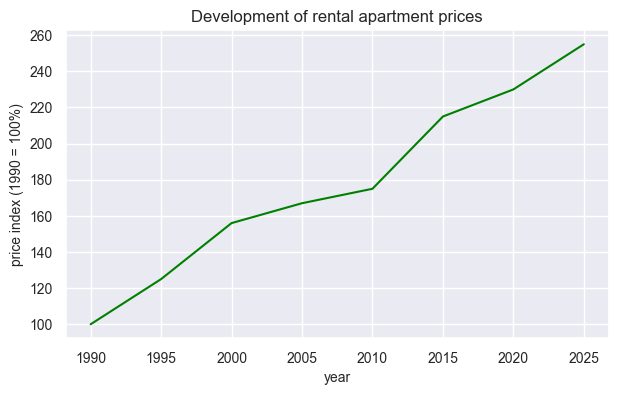

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<AxesSubplot: xlabel='price'>

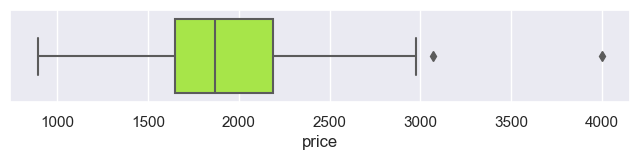

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['price'], color="greenyellow")

<AxesSubplot: xlabel='area'>

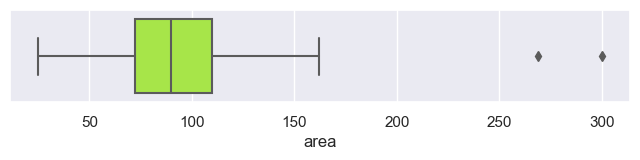

In [20]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

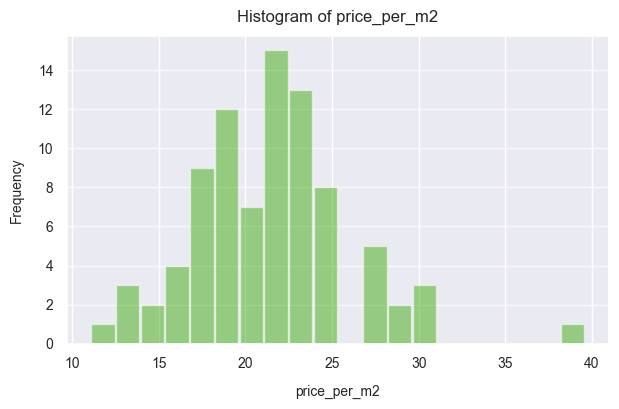

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

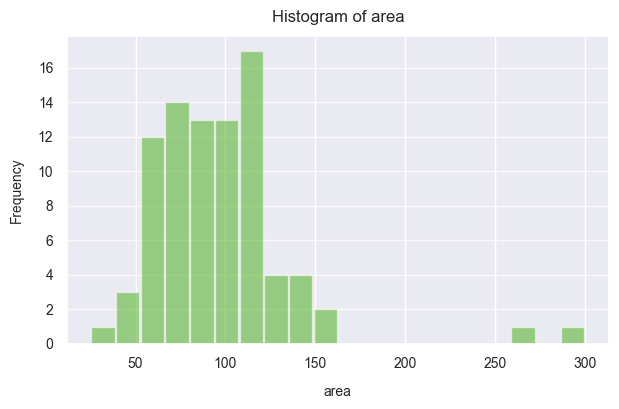

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df['area'], 
                            bins=20, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('area', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of area', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

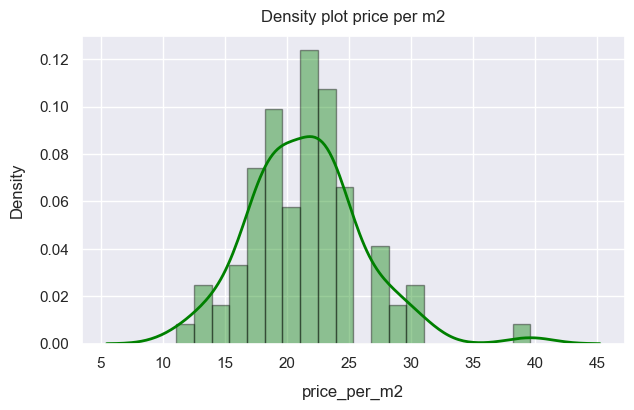

In [23]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

     area       var
845    25 -1.781919
653    46 -1.256787
652    50 -1.156762
730    50 -1.156762
483    54 -1.056737
..    ...       ...
780   147  1.268849
808   160  1.593931
859   162  1.643943
654   269  4.319617
851   300  5.094813

[85 rows x 2 columns]


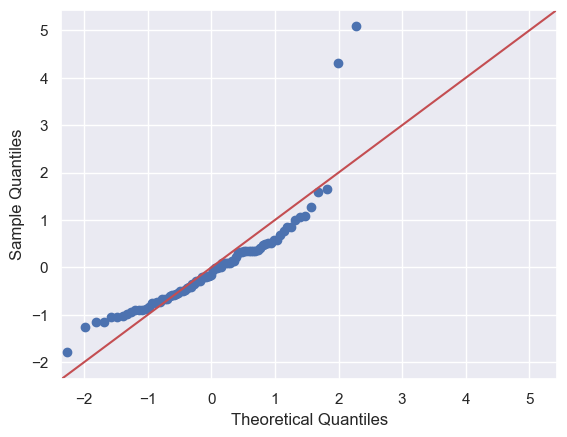

In [24]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

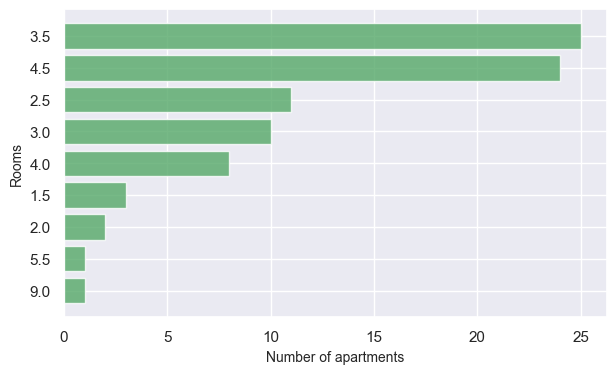

In [25]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, labels=index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

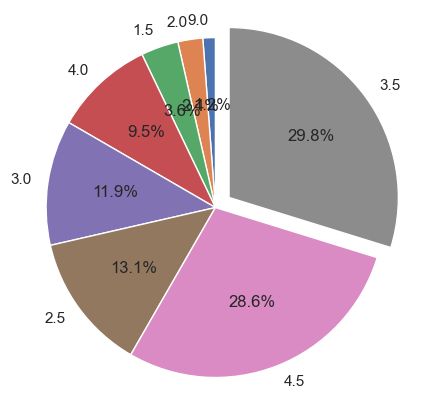

In [26]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

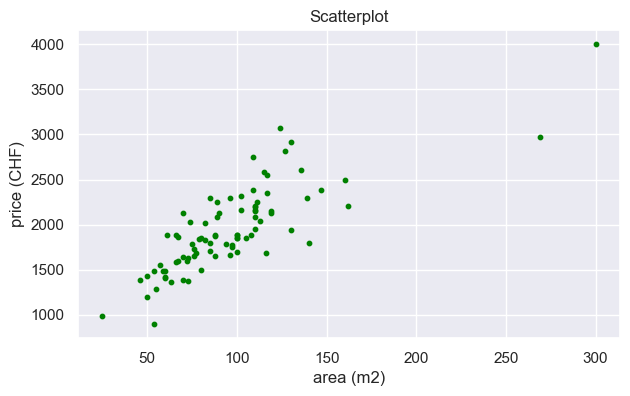

In [27]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(83, 12)
9.505009929957506
1041.3602956331847


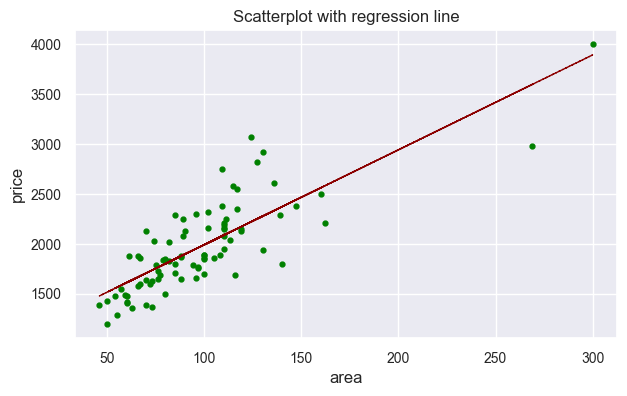

In [28]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

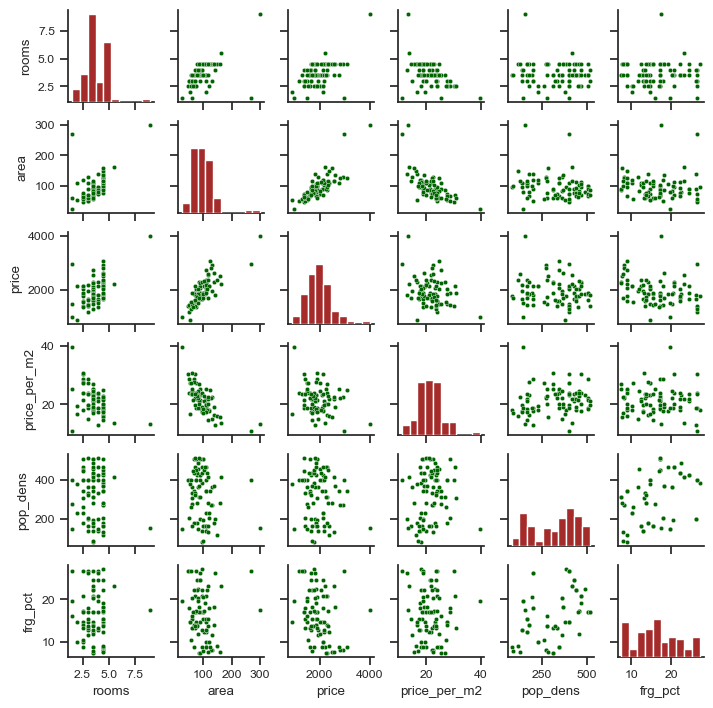

In [29]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(83, 12)


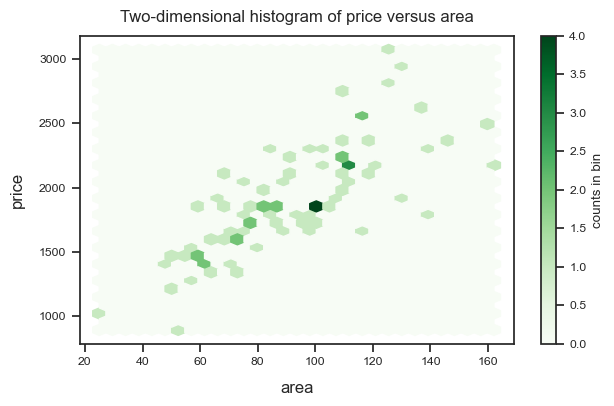

In [30]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<AxesSubplot: >

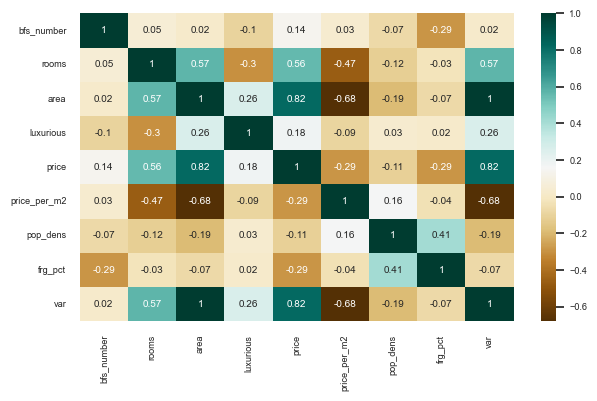

In [31]:
# Set font size for plot
sns.set(font_scale=0.6)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df.corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

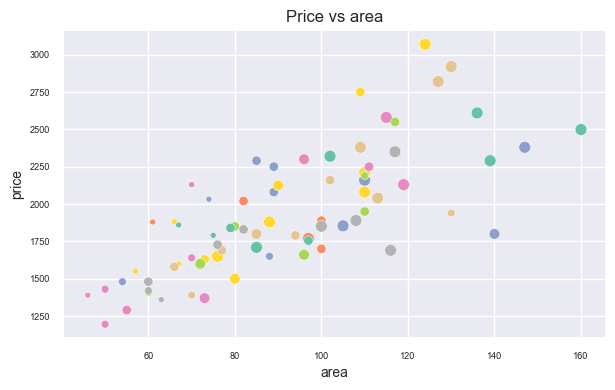

In [32]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [33]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2022-10-11 12:50:01
Python Version: 3.9.13
-----------------------------------
